In [1]:
NAMES = 'https://raw.githubusercontent.com/girafe-ai/ml-mipt/master/week0_10_embeddings_and_seq2seq/names'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
start_token = " "
def read_names(path_to_file):
    global start_token
    with open(path_to_file) as f:
        names = f.read()[:-1].split('\n')
        names = [start_token + line for line in names]
        return names

In [3]:
try:
    names = read_names('names.txt')
except FileNotFoundError:
    print('no data')

In [4]:
print('n samples = ', len(names))
for x in names[::1000]:
    print(x)

n samples =  7944
 Abagael
 Claresta
 Glory
 Liliane
 Prissie
 Geeta
 Giovanne
 Piggy


In [5]:
list(map(len, names))

[8,
 8,
 5,
 6,
 5,
 6,
 5,
 8,
 8,
 8,
 5,
 7,
 4,
 5,
 8,
 6,
 6,
 6,
 5,
 6,
 9,
 6,
 8,
 8,
 8,
 8,
 7,
 7,
 6,
 5,
 4,
 7,
 6,
 6,
 6,
 7,
 7,
 6,
 6,
 9,
 7,
 8,
 8,
 9,
 9,
 7,
 8,
 9,
 7,
 8,
 8,
 3,
 6,
 6,
 7,
 7,
 5,
 6,
 5,
 5,
 8,
 6,
 7,
 8,
 7,
 7,
 8,
 5,
 6,
 8,
 5,
 5,
 6,
 7,
 7,
 6,
 5,
 7,
 6,
 5,
 6,
 6,
 5,
 8,
 8,
 8,
 8,
 5,
 7,
 8,
 6,
 7,
 6,
 7,
 7,
 8,
 10,
 10,
 7,
 7,
 6,
 7,
 8,
 6,
 10,
 12,
 6,
 6,
 11,
 6,
 8,
 5,
 6,
 10,
 12,
 6,
 7,
 8,
 8,
 7,
 6,
 8,
 4,
 5,
 6,
 6,
 7,
 7,
 6,
 7,
 6,
 6,
 5,
 6,
 7,
 7,
 7,
 7,
 5,
 6,
 5,
 7,
 8,
 7,
 5,
 10,
 6,
 7,
 6,
 8,
 8,
 7,
 5,
 7,
 6,
 6,
 8,
 5,
 7,
 8,
 7,
 7,
 7,
 7,
 8,
 8,
 5,
 5,
 7,
 7,
 7,
 8,
 7,
 6,
 6,
 5,
 6,
 6,
 7,
 7,
 6,
 7,
 7,
 9,
 7,
 7,
 8,
 7,
 7,
 8,
 7,
 7,
 7,
 8,
 7,
 6,
 7,
 6,
 6,
 8,
 9,
 6,
 4,
 7,
 7,
 8,
 8,
 8,
 4,
 5,
 6,
 10,
 4,
 4,
 7,
 9,
 9,
 6,
 9,
 8,
 9,
 9,
 10,
 10,
 11,
 8,
 6,
 5,
 6,
 6,
 7,
 9,
 7,
 7,
 7,
 9,
 10,
 11,
 10,
 5,
 11,
 5,
 6,
 7,
 7,
 5,


max length = 16


(array([1.900e+01, 2.720e+02, 0.000e+00, 9.270e+02, 0.000e+00, 1.877e+03,
        0.000e+00, 2.049e+03, 0.000e+00, 1.447e+03, 0.000e+00, 8.460e+02,
        0.000e+00, 3.510e+02, 0.000e+00, 1.160e+02, 0.000e+00, 2.400e+01,
        0.000e+00, 1.000e+01, 0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00]),
 array([ 3.  ,  3.52,  4.04,  4.56,  5.08,  5.6 ,  6.12,  6.64,  7.16,
         7.68,  8.2 ,  8.72,  9.24,  9.76, 10.28, 10.8 , 11.32, 11.84,
        12.36, 12.88, 13.4 , 13.92, 14.44, 14.96, 15.48, 16.  ]),
 <BarContainer object of 25 artists>)

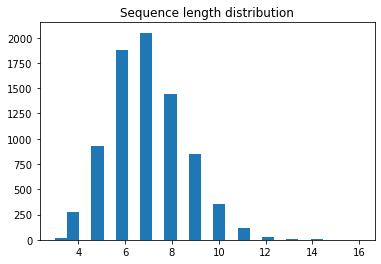

In [6]:
MAX_LENGTH = max(map(len, names))
print("max length =", MAX_LENGTH)
plt.title('Sequence length distribution')
plt.hist(list(map(len, names)), bins=25)


Text processing

сначала нам нужно взять коллекцию словарь со всеми уникальными токенами. Т.е. уникальными символами

In [7]:
tokens = set()

In [8]:
for name in names:
    tokens.update(set(name))
tokens = list(tokens)
num_tokens = len(tokens)
print('num_tokens = ', num_tokens)

assert 50 < num_tokens < 60, "Names should contain within 50 and 60 unique tokens depending on encoding"

num_tokens =  55


In [9]:
tokens

['y',
 'a',
 'E',
 'r',
 'n',
 'z',
 'Q',
 'e',
 'K',
 'h',
 't',
 'B',
 'L',
 'J',
 'V',
 'x',
 'M',
 'j',
 'p',
 'I',
 's',
 'q',
 'm',
 'O',
 'G',
 "'",
 'D',
 'b',
 'd',
 'l',
 'o',
 'F',
 'P',
 'v',
 'w',
 'R',
 'c',
 'Y',
 'N',
 'T',
 'S',
 'u',
 'C',
 'k',
 'W',
 'A',
 'i',
 'H',
 '-',
 'X',
 ' ',
 'g',
 'Z',
 'U',
 'f']

In [10]:
token_to_id = {token: idx for idx, token in enumerate(tokens)}

In [11]:
token_to_id

{'y': 0,
 'a': 1,
 'E': 2,
 'r': 3,
 'n': 4,
 'z': 5,
 'Q': 6,
 'e': 7,
 'K': 8,
 'h': 9,
 't': 10,
 'B': 11,
 'L': 12,
 'J': 13,
 'V': 14,
 'x': 15,
 'M': 16,
 'j': 17,
 'p': 18,
 'I': 19,
 's': 20,
 'q': 21,
 'm': 22,
 'O': 23,
 'G': 24,
 "'": 25,
 'D': 26,
 'b': 27,
 'd': 28,
 'l': 29,
 'o': 30,
 'F': 31,
 'P': 32,
 'v': 33,
 'w': 34,
 'R': 35,
 'c': 36,
 'Y': 37,
 'N': 38,
 'T': 39,
 'S': 40,
 'u': 41,
 'C': 42,
 'k': 43,
 'W': 44,
 'A': 45,
 'i': 46,
 'H': 47,
 '-': 48,
 'X': 49,
 ' ': 50,
 'g': 51,
 'Z': 52,
 'U': 53,
 'f': 54}

In [12]:
def to_matrix(names, max_len=None, pad=token_to_id[' '], dtype='int32', batch_first = True):
    """Casts a list of names into rnn-digestable matrix"""
    max_len = max_len or max(map(len, names))
    names_ix = np.zeros([len(names), max_len], dtype) + pad
    print('======step 1========')
    print(names_ix)
    for i in range(len(names)):
        line_ix = [token_to_id[c] for c in names[i]]
        print('======step 2========')
        print( names[i])
        print(line_ix)
        names_ix[i, :len(line_ix)] = line_ix
    if not batch_first: # convert [batch, time] into [time, batch]
        names_ix = np.transpose(names_ix)
    print('======step 3========')
    print(line_ix)
       
    return names_ix

In [13]:
names[:2]

[' Abagael', ' Abagail']

In [14]:
#Example cast 4 random names to matrices, pad in zeros

In [15]:
print('\n'.join(names[::2000]))
print(to_matrix(names[::2000]))

 Abagael
 Glory
 Prissie
 Giovanne
======step 1========
[[50 50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50 50]]
======step 2========
 Abagael
[50, 45, 27, 1, 51, 1, 7, 29]
======step 2========
 Glory
[50, 24, 29, 30, 3, 0]
======step 2========
 Prissie
[50, 32, 3, 46, 20, 20, 46, 7]
======step 2========
 Giovanne
[50, 24, 46, 30, 33, 1, 4, 4, 7]
======step 3========
[50, 24, 46, 30, 33, 1, 4, 4, 7]
[[50 45 27  1 51  1  7 29 50]
 [50 24 29 30  3  0 50 50 50]
 [50 32  3 46 20 20 46  7 50]
 [50 24 46 30 33  1  4  4  7]]


In [16]:
import torch, torch.nn as nn
import torch.nn.functional as F

In [23]:
class CharRNNCell(nn.Module):
    """
    Implement the scheme above as torch module
    """
    def __init__(self, num_tokens=len(tokens), embedding_size=16, rnn_num_units=64):
        super(self.__class__, self).__init__()
        self.num_units = rnn_num_units
        
        self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.rnn_update = nn.Linear(embedding_size+rnn_num_units, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)
    
    def forward(self, x, h_prev):
        """
        This method computed h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence
        
        :param x: batch of character ids, containing vector of int64
        :param h_prev: previous rnn hidden states, containing matrix [batch. rnn_num_units] of float32
        """
        # get vector embedding of x
        x_emb = self.embedding(x)
        
        #compute next hidden state using self.rnn_update
        # hint: use torch.cat(..., dim=...) for concatenation
        x_and_h = torch.cat([x_emb, h_prev], dim=1)
        h_next = self.rnn_update(x_and_h)
        
        h_next = torch.tanh(h_next)
        
        assert h_next.size() == h_prev.size()
        
        #compute logits for next character probe
        logits = self.rnn_to_logits(h_next)
        
        return h_next, F.log_softmax(logits, -1)
    
    def initial_state(self, batch_size):
        """return rnn state before it processes first input (aka h0) """
        return torch.zeros(batch_size, self.num_units, requires_grad=True)

In [24]:
char_rnn = CharRNNCell()
criterion = nn.NLLLoss()

In [27]:
def rnn_loop(char_rnn, batch_ix):
    """
    Computes log P(next_character) for all time-steps in names ix
    :param names_ix: an int32 matrix of shape [batch, time], output of to_matrix(names)
    """
    batch_size, max_length = batch_ix.size()
    hid_state = char_rnn.initial_state(batch_size)
    logprobs = []
    
    for x_t in batch_ix.transpose(0,1):
        hid_state, logp_next = char_rnn(x_t, hid_state)
        logprobs.append(logp_next)
    
    return torch.stack(logprobs, dim=1)

In [28]:
batch_ix = to_matrix(names[:5])
batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

logp_seq = rnn_loop(char_rnn, batch_ix)

assert torch.max(logp_seq).data.numpy() <= 0 
assert tuple(logp_seq.size()) == batch_ix.shape + (num_tokens,)

======step 1========
[[50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50]
 [50 50 50 50 50 50 50 50]]
======step 2========
 Abagael
[50, 45, 27, 1, 51, 1, 7, 29]
======step 2========
 Abagail
[50, 45, 27, 1, 51, 1, 46, 29]
======step 2========
 Abbe
[50, 45, 27, 27, 7]
======step 2========
 Abbey
[50, 45, 27, 27, 7, 0]
======step 2========
 Abbi
[50, 45, 27, 27, 46]
======step 3========
[50, 45, 27, 27, 46]


In [29]:
predictions_logp = logp_seq[:,:-1]
actual_next_tokens = batch_ix[:, 1:]
# .contiguous() method checks that tensor is stored in the memory correctly to get its view of desired shape
# метод проверяет, что тензор правильно хранится в памяти, чтобы получить представление желаемой формы
loss = criterion(predictions_logp.contiguous().view(-1, num_tokens), actual_next_tokens.contiguous().view(-1))

In [34]:
batch_ix.transpose(0,1)

tensor([[50, 50, 50, 50, 50],
        [45, 45, 45, 45, 45],
        [27, 27, 27, 27, 27],
        [ 1,  1, 27, 27, 27],
        [51, 51,  7,  7, 46],
        [ 1,  1, 50,  0, 50],
        [ 7, 46, 50, 50, 50],
        [29, 29, 50, 50, 50]])

Likelihood and gradients

In [35]:
# we can now train neural network to minimize crossentropy (maximize log-likelihood) with the actual next tokens

In [40]:
actual_next_tokens

tensor([[45, 27,  1, 51,  1,  7, 29],
        [45, 27,  1, 51,  1, 46, 29],
        [45, 27, 27,  7, 50, 50, 50],
        [45, 27, 27,  7,  0, 50, 50],
        [45, 27, 27, 46, 50, 50, 50]])

In [42]:
predictions_logp.shape

torch.Size([5, 7, 55])

In [38]:
loss.backward()

In [39]:
for w in char_rnn.parameters():
    assert w.grad is not None and torch.max(torch.abs(w.grad)).data.numpy() != 0, \
        "Loss is not differentiable w.r.t. a weight with shape %s. Check forward method." % (w.size(),)

The training loop


In [43]:
# we train our char-rnn exactly the same way we train any deep learning model: by minibatch sgd
# the only difference is that this time we sample strings, not images or sound

In [44]:
from IPython.display import clear_output
from random import sample

char_rnn = CharRNNCell()
criterion = nn.NLLLoss()
opt = torch.optim.Adam(char_rnn.parameters())
history = []

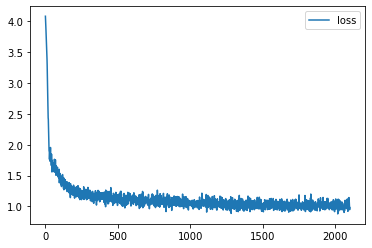

In [47]:
MAX_LENGTH = 16

for i in range(1000):
    batch_ix = to_matrix(sample(names, 32), max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    logp_seq = rnn_loop(char_rnn, batch_ix)
    predictions_logp = logp_seq[:,:-1]
    actual_next_tokens = batch_ix[:, 1:]
    loss = criterion(
        predictions_logp.contiguous().view(-1, num_tokens),
        actual_next_tokens.contiguous().view(-1)
    )
    
    #train with backprop
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    history.append(loss.data.numpy())
    if (i+1)%100==0:
        clear_output(True)
        plt.plot(history, label='loss')
        plt.legend()
        plt.show()
assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge"
    
    
    
    

In [51]:
def generate_sample(char_rnn, seed_phrase= ' ', max_length=MAX_LENGTH, temperature=1.0):
    '''
    The function generate text given a phrase of length at least Seq_LENGTH
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling. higher temperature produces more chaotic outputs
    smaller temperature converges to the single most likely output
    '''
    
    x_sequence = [token_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    
    for i in range(len(seed_phrase) -1):
        hid_state, _ = char_rnn(x_sequence[:,i], hid_state)
    
    #start generating
    for _ in range(max_length- len(seed_phrase)):
        hid_state, logp_next = char_rnn(x_sequence[:, -1], hid_state)
        p_next = F.softmax(logp_next/ temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens, p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [52]:
for _ in range(10):
    print(generate_sample(char_rnn))

 Clissand       
 Magbed         
 Ahsian         
 Denisy         
 Gertie         
 Berri          
 Shdtend        
 Ja             
 Stelide        
 Dary           


In [53]:
for _ in range(50):
    print(generate_sample(char_rnn, seed_phrase=' Deb'))

 Debin          
 Debis          
 Debt           
 Debril         
 Debinie        
 Debthi         
 Debhlell       
 Debix          
 Debneura       
 Debrie         
 Debiann        
 Debbia         
 Deba           
 Debica         
 Debinma        
 Debinie        
 Debic          
 Debiate        
 Debieli        
 Debhan         
 Debah          
 Debadid        
 Debartin       
 Debione        
 Debmaderga     
 Debicha        
 Debil          
 Debunel        
 Debsa          
 Debel          
 Debka          
 Debila-        
 Debel          
 Debe           
 Debantzeen     
 Deba-          
 Debie          
 Debrolane      
 Debora         
 Debane         
 Debo           
 Debelet        
 Debke          
 Debrine        
 Debari         
 Debilee        
 Debi           
 Debamamo       
 Debry          
 Debanne        
